In [68]:
import sys
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn import set_config; set_config(display='diagram')

sys.path.append("/Users/antonis/code/Ant-mel/legendary_game_recs/")
from preprocessing.preprocess_1_cleaning import *
from preprocessing.preprocess_2_features import *
from preprocessing.pipeline_the_unification import *
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
import datetime
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.neighbors import KNeighborsRegressor


In [3]:
data = pd.read_csv('../raw_data/all_game_data_v1_corrected2')

In [4]:
cleaning = FunctionTransformer(cleaning_in_notebook)
remove_0_reviews = FunctionTransformer(remove_no_reviews)
only_mains = FunctionTransformer(only_main_games)
drop_some_cols = FunctionTransformer(drop_unnecesary_coulumns)



pipeline = Pipeline([('cleaning', cleaning),
                     ('remove_no_reviews', remove_0_reviews),
                     ('keeps_only_main_games', only_mains)])


clean_data = pipeline.fit_transform(data)

/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=pd.to_datetime(df[column])
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_2_features.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe['gen'] = None
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [8]:
clean_data.columns

Index(['title', 'release_date', 'plays', 'playing', 'backlogs', 'wishlist',
       'developers', 'avg_review', 'genres', 'platforms', 'description',
       'total_reviews', 'total_lists', 'main', 'ratings_zero_five',
       'ratings_one_zero', 'ratings_one_five', 'ratings_two_zero',
       'ratings_two_five', 'ratings_three_zero', 'ratings_three_five',
       'ratings_four_zero', 'ratings_four_five', 'ratings_five_zero', 'image',
       'url', 'gen'],
      dtype='object')

<Axes: >

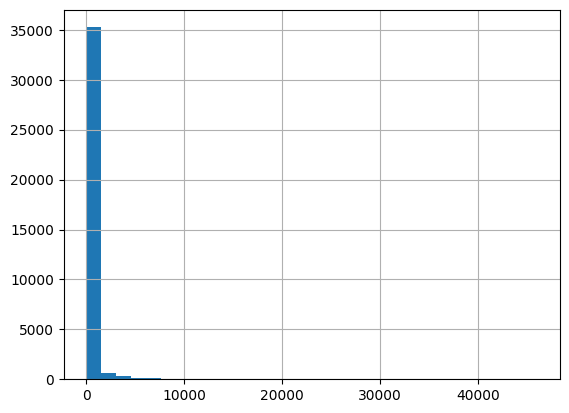

In [18]:
clean_data['plays'].hist(bins=30)

<Axes: >

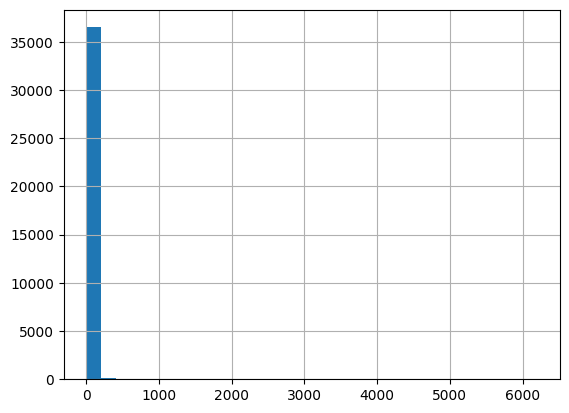

In [17]:
clean_data['playing'].hist(bins=30)

<Axes: >

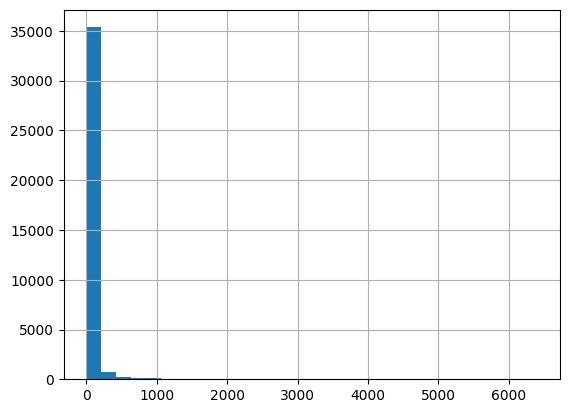

In [16]:
clean_data['wishlist'].hist(bins=30)

<Axes: >

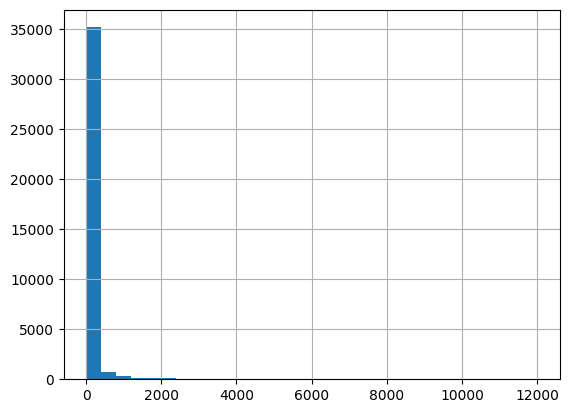

In [19]:
clean_data['backlogs'].hist(bins=30)

<Axes: >

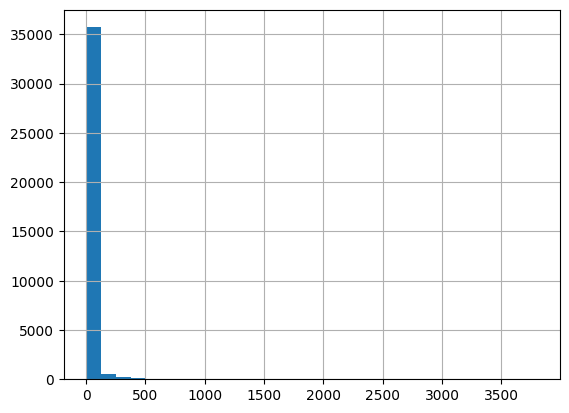

In [20]:
clean_data['total_reviews'].hist(bins=30)

<Axes: >

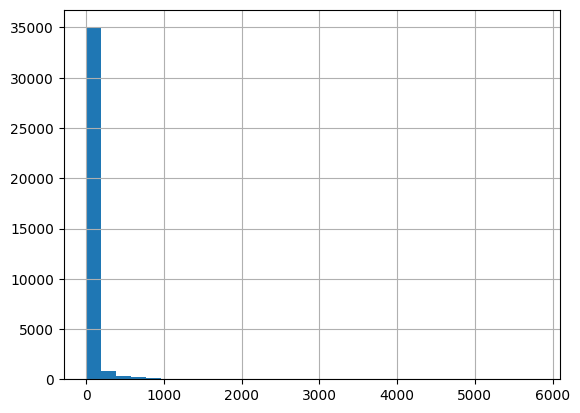

In [21]:
clean_data['total_lists'].hist(bins=30)

In [27]:
no_plays_mask = clean_data['wishlist'] > 10

clean_data[no_plays_mask]

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url,gen
166,Anger Foot,2024-12-31,80,1,82,297,"[Devolver Digital, Robbie Fraser]",3.3,"[Brawler, Indie, Shooter]",[Windows PC],...,0,1,13,7,7,2,1,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/anger-foot/,3
599,The Making of Karateka,2023-08-29,10,3,9,41,[Digital Eclipse],4.5,"[Adventure, Fighting, Platform]","[Windows PC, PlayStation 4, Xbox One, PlayStat...",...,0,0,0,0,2,4,2,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-making-of-...,3
634,Enigma of Fear,2023-12-31,16,0,26,155,[Dumativa Game Studio],2.1,"[Adventure, Indie, Puzzle]",[Windows PC],...,0,0,0,0,0,0,4,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/enigma-of-fear/,3
706,They Speak From the Abyss,2023-12-31,10,0,48,85,"[2 Left Thumbs, Nikki Kalpa]",3.2,"[Adventure, Indie, RPG]",[Windows PC],...,0,0,1,1,1,0,1,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/they-speak-fro...,3
927,Inazuma Eleven: Victory Road,2023-12-31,5,1,30,154,[LEVEL-5],4.7,"[RPG, Sport]","[Android, PlayStation 4, iOS, Nintendo Switch]",...,0,0,0,0,1,0,2,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/inazuma-eleven...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116713,Spacewar!,1962-04-30,87,0,19,32,"[Steve Russel, Computer Recreations, Inc.]",2.9,"[Shooter, Simulator]","[PDP-11, PDP-1]",...,5,9,5,4,6,2,4,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/spacewar/,1
116715,Tennis for Two,1958-10-18,64,0,14,25,[William Higinbotham],2.9,"[Arcade, Sport]",[Donner Model 30],...,4,10,12,2,0,2,9,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tennis-for-two/,1
116721,Cathode Ray Tube Amusement Device,1947-12-31,80,1,14,34,[],3.5,[Point-and-Click],[Analogue electronics],...,3,6,6,1,2,1,30,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/cathode-ray-tu...,1
117115,Skator Gator 3D,2023-08-31,8,1,5,21,[Weathered Sweater],3.4,"[Adventure, Indie, Sport]",[Windows PC],...,0,1,1,2,2,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/skator-gator-3d/,3


In [46]:
num_transformer_rob = Pipeline([('mm_scaler', RobustScaler())])

col_transformer = ColumnTransformer([('num_transformer', num_transformer_rob,
                                   ['plays','playing','backlogs','wishlist','total_reviews','total_lists'])],
                                  remainder='passthrough')

def make_training_data_robust(reference_data):
    dropped = drop_unnecesary_coulumns(reference_data)

    transformed = pd.DataFrame(col_transformer.fit_transform(dropped))

    X_train = transformed.drop(6, axis=1)
    y_train = transformed[6]

    return X_train, y_train

In [30]:
refernce = pipeline_genre_ohe_only(data)
X, y = make_training_data_robust(refernce)

X

/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=pd.to_datetime(df[column])
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_2_features.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe['gen'] = None
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.202703,0.0,-0.21875,-0.176471,-0.166667,-0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.783784,0.5,2.28125,17.176471,1.000000,4.363636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.175676,0.0,-0.12500,-0.235294,-0.333333,-0.227273,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.162162,1.5,0.00000,2.117647,0.500000,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.081081,0.0,0.53125,8.823529,1.666667,0.863636,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,-0.243243,0.0,-0.25000,-0.058824,-0.333333,-0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36816,-0.216216,0.0,-0.28125,-0.235294,-0.166667,-0.272727,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36817,-0.256757,0.0,-0.28125,-0.294118,-0.333333,-0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36818,-0.054054,0.0,-0.28125,-0.294118,0.000000,-0.045455,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
drop_unnecesary_coulumns(refernce)

,plays,playing,backlogs,wishlist,avg_review,total_reviews,total_lists,Adventure,Indie,RPG,Simulator,Puzzle,Shooter,Strategy,Platform,Arcade,Sport,gen_1,gen_2,gen_3
0,7,0,2,2,2.2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,1
1,80,1,82,297,3.3,8,104,0,1,0,0,0,1,0,0,0,0,0,0,1
2,9,0,5,1,2.4,0,3,1,0,1,1,0,0,0,0,0,0,0,0,1
3,10,3,9,41,4.5,5,12,1,0,0,0,0,0,0,1,0,0,0,0,1
4,16,0,26,155,2.1,12,27,1,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,4,0,1,4,3.8,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0
36816,6,0,0,1,2.7,1,2,1,1,0,0,0,0,0,0,0,0,0,1,0
36817,3,0,0,0,2.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36818,18,0,0,0,2.0,2,7,0,1,0,1,0,0,1,0,0,0,0,0,1


<Axes: >

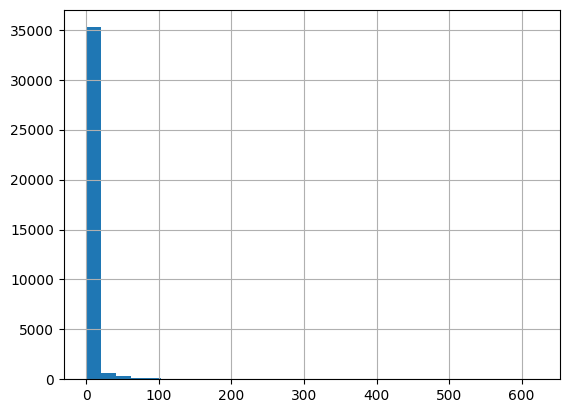

In [38]:
X[0].hist(bins=30)

In [39]:
X_max, y_max = make_training_data(refernce)

<Axes: >

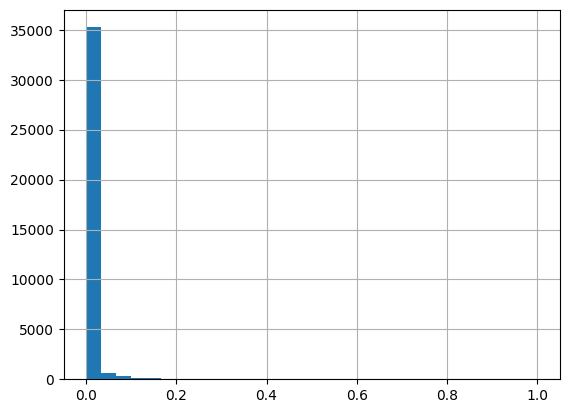

In [42]:
X_max[0].hist(bins=30)

<Axes: >

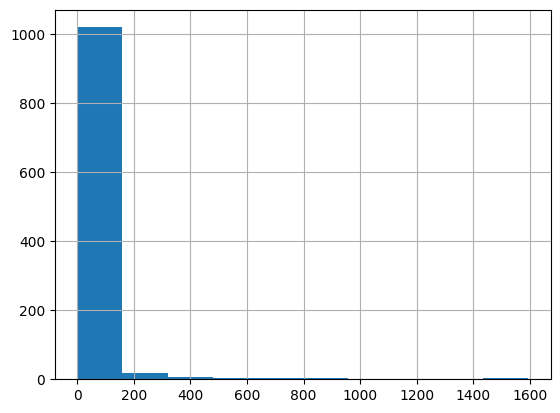

In [43]:
refernce['plays'].value_counts().hist()

In [63]:

playing_mask = refernce['playing'] > 0
refernce_plays = refernce[playing_mask]
refernce_plays['plays'].sort_values()

13           1
1135         2
7772         2
19718        2
2514         2
         ...  
23742    38000
19941    40000
17297    42000
11702    42000
19287    46000
Name: plays, Length: 15937, dtype: int64

In [64]:
num_transformer_yeo = PowerTransformer(method='yeo-johnson', standardize=False)

col_transformer = ColumnTransformer([('num_transformer', num_transformer_yeo,
                                   ['plays','playing','backlogs','wishlist','total_reviews','total_lists'])],
                                  remainder='passthrough')

def make_training_data_box_yeo(reference_data):
    dropped = drop_unnecesary_coulumns(reference_data)

    transformed = pd.DataFrame(col_transformer.fit_transform(dropped))

    X_train = transformed.drop(6, axis=1)
    y_train = transformed[6]

    return X_train, y_train

In [65]:
X_stand_box, y_stand_box = make_training_data_box_yeo(refernce)

<Axes: >

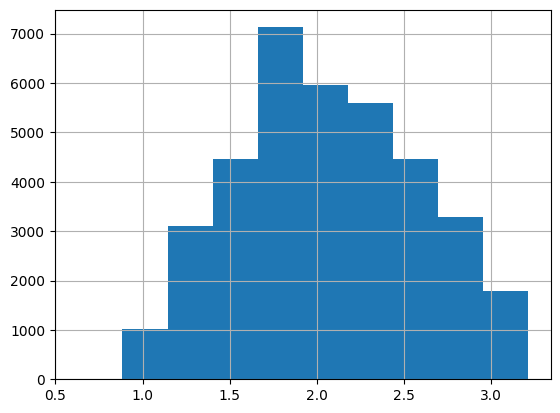

In [66]:
X_stand_box[0].hist()

In [69]:
knn_model = KNeighborsRegressor(n_neighbors=11).fit(X_stand_box, y_stand_box)

In [78]:
zelda_array = X_stand_box[11702:11703]
omori_array = X_stand_box[4532:4534]
wipeout_array = X_stand_box[32334:32335]
array_inputs = np.concatenate((omori_array, wipeout_array))
ind_list = list(knn_model.kneighbors(array_inputs,n_neighbors=11)[1][0])
refernce.iloc[ind_list, :]

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,platforms,description,...,Simulator,Puzzle,Shooter,Strategy,Platform,Arcade,Sport,gen_1,gen_2,gen_3
4532,Omori,2020-12-25,11000,1300,6400,5000,"[OMOCAT, PLAYISM]",4.1,"[Windows PC, Mac, PlayStation 4, Xbox One, Nin...",A turn-based surreal horror RPG in which a chi...,...,0,0,0,0,0,0,0,0,0,1
8456,Hades,2018-12-07,30000,4000,8800,4700,[Supergiant Games],4.3,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...",A rogue-lite hack and slash dungeon crawler in...,...,0,0,0,0,0,0,0,0,0,1
14354,Undertale,2015-09-15,37000,886,7100,2500,"[tobyfox, 8-4]",4.3,"[Windows PC, Mac, Linux, PlayStation 4, Xbox O...","A small child falls into the Underground, wher...",...,0,0,0,0,0,0,0,0,0,1
3491,Death's Door,2021-07-20,4700,396,2600,1700,"[Acid Nerve, Devolver Digital]",3.8,"[Windows PC, PlayStation 4, Xbox One, PlayStat...",Reaping souls of the dead and punching a clock...,...,0,0,0,0,0,0,0,0,0,1
15541,Lisa,2014-12-15,3600,164,2800,1600,[Dingaling],4.3,"[Windows PC, Mac, Linux]",Lisa is a quirky side-scrolling RPG set in a p...,...,0,0,0,0,0,0,0,0,0,1
7684,Pathologic 2,2019-05-23,1800,198,2400,1600,"[Ice-Pick Lodge, tinyBuild]",4.4,"[Windows PC, PlayStation 4, Xbox One]",Pathologic 2 is a narrative-driven dramatic th...,...,0,0,0,0,0,0,0,0,0,1
1948,Citizen Sleeper,2022-05-05,1800,184,1600,1300,"[Jump Over the Age, Fellow Traveller]",4.1,"[Windows PC, Mac, PlayStation 4, Xbox One, Pla...",Roleplaying in the ruins of interplanetary cap...,...,0,0,0,0,0,0,0,0,0,1
11016,Pyre,2017-07-25,2300,96,1900,785,[Supergiant Games],4.0,"[Windows PC, Mac, Linux, PlayStation 4]",A party-based RPG/visual novel/sports game hyb...,...,0,0,0,0,0,0,0,0,0,1
3165,Eastward,2021-09-16,1200,284,1800,1600,"[Chucklefish Games, Pixpil Studio]",3.5,"[Windows PC, Mac, Xbox One, Nintendo Switch]",Eastward is a beautifully detailed and charmin...,...,0,0,0,0,0,0,0,0,0,1
16129,Crypt of the NecroDancer,2015-04-23,5000,183,2100,485,"[Klei Entertainment, Brace Yourself Games]",3.5,"[Windows PC, Mac, Linux, PlayStation 4, iOS, X...",Crypt of the NecroDancer is a hardcore rogueli...,...,0,0,0,0,0,0,0,0,0,1
